### 8. Implement one instance of transfer learning (find a related bigger dataset online) and explain all the steps 20

a. Explain the bigger dataset with visualization and summary statistics.

[EdNet](https://arxiv.org/abs/1912.03072?utm_source=chatgpt.com)



#### Description

EdNet is a large‑scale hierarchical dataset of student interactions in an educational setting. 

It contains 131,441,538 interactions from 784,309 students, collected over more than two years. 

The interactions are diverse: not just answer‑correct/incorrect, but also lecture consumption, item purchasing, question solving, etc. 

This makes it especially useful for modelling student learning trajectories, behaviours, and outcomes — which is very related to your “graduation/prediction” context.

#### Why Useful for Transfer Learning

Because it is large and covers many students and varied behaviours, a model pre‑trained on EdNet can learn general “student behaviour/learning” features (patterns of progression, question answering behaviour, etc).

Then you can fine‑tune that model on your smaller dataset (the “graduation” dataset) to adapt it to your specific target (graduation outcome) while leveraging the learned representations from EdNet.

This helps especially if your smaller dataset is limited in size — transfer learning can improve generalisation.

EdNet columns: ['timestamp', 'action_type', 'item_id', 'source', 'user_answer', 'platform']
EdNet shape: (101821, 6)
           timestamp action_type item_id       source user_answer platform
count   1.018210e+05      101821  101821       101821       37829   101821
unique           NaN           3   16354            6           4        1
top              NaN     respond   b3368  review_quiz           b   mobile
freq             NaN       37829      34        54448       10744   101821
mean    1.557024e+12         NaN     NaN          NaN         NaN      NaN
std     7.455333e+09         NaN     NaN          NaN         NaN      NaN
min     1.540615e+12         NaN     NaN          NaN         NaN      NaN
25%     1.550045e+12         NaN     NaN          NaN         NaN      NaN
50%     1.557401e+12         NaN     NaN          NaN         NaN      NaN
75%     1.562279e+12         NaN     NaN          NaN         NaN      NaN
max     1.573154e+12         NaN     NaN          NaN     

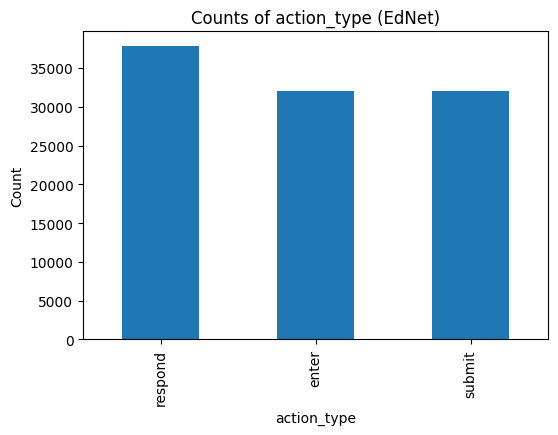

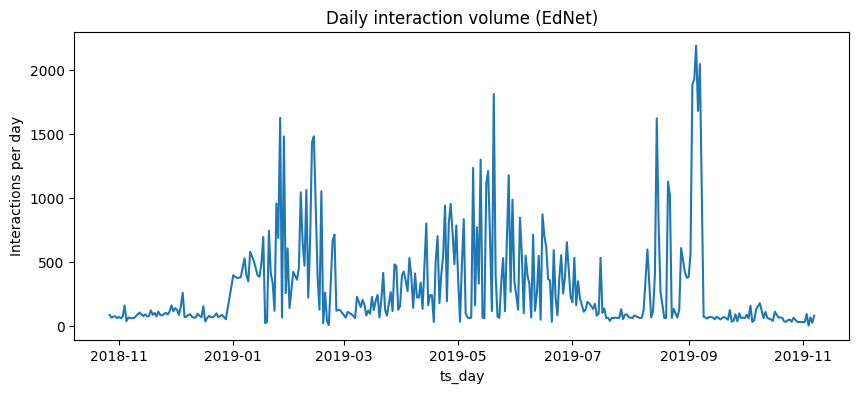

In [6]:
# 1️⃣ Load EdNet CSV
ednet_df = pd.read_csv("student-graduation/u9582.csv")

# 2️⃣ Quick summary
print("EdNet columns:", ednet_df.columns.tolist())
print("EdNet shape:", ednet_df.shape)
print(ednet_df.describe(include='all'))

# 3️⃣ Visualizations
# Action type counts
if "action_type" in ednet_df.columns:
    plt.figure(figsize=(6,4))
    ednet_df["action_type"].value_counts().plot(kind="bar")
    plt.title("Counts of action_type (EdNet)")
    plt.ylabel("Count")
    plt.show()

# Daily interactions (if timestamp exists)
if "timestamp" in ednet_df.columns:
    ednet_df["ts_day"] = pd.to_datetime(ednet_df["timestamp"], unit='ms').dt.date
    daily_counts = ednet_df.groupby("ts_day").size()
    plt.figure(figsize=(10,4))
    daily_counts.plot()
    plt.title("Daily interaction volume (EdNet)")
    plt.ylabel("Interactions per day")
    plt.show()
